# Graduate Admission Regression Project

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np   
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Tensorflow
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Flatten
from keras.datasets import mnist
from keras.callbacks import EarlyStopping # to stop without completing all epochs
from keras.layers import Dropout


In [11]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.drop(columns='Serial No.',inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [13]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [16]:
df.columns = df.columns.str.strip()

In [17]:
# dependent and independent features
X = df.drop('Chance of Admit',axis=1)
y = df['Chance of Admit']

In [18]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)


In [19]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


### MinMaxScaling

In [20]:
minmaxscale = MinMaxScaler()
X_train = minmaxscale.fit_transform(X_train)
X_test = minmaxscale.transform(X_test)

## Training model

In [21]:
model = Sequential()

model.add(Dense(7,activation= 'relu',input_dim = 7))
model.add(Dense(1,activation = 'linear'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [23]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [24]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics='accuracy')

In [25]:
history = model.fit(X_train,y_train,epochs=500,validation_split=0.2,callbacks=callback)

Epoch 1/500
10/10 [==============================] - 1s 31ms/step - loss: 1.1188 - accuracy: 0.0000e+00 - val_loss: 0.8905 - val_accuracy: 0.0000e+00
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6721 - accuracy: 0.0000e+00 - val_loss: 0.4912 - val_accuracy: 0.0000e+00
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 0.3573 - accuracy: 0.0000e+00 - val_loss: 0.2453 - val_accuracy: 0.0000e+00
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1794 - accuracy: 0.0000e+00 - val_loss: 0.1255 - val_accuracy: 0.0000e+00
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1010 - accuracy: 0.0000e+00 - val_loss: 0.0869 - val_accuracy: 0.0000e+00
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0764 - accuracy: 0.0000e+00 - val_loss: 0.0826 - val_accuracy: 0.0000e+00
Epoch 7/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0732 - accuracy: 0.0000e+00 - 

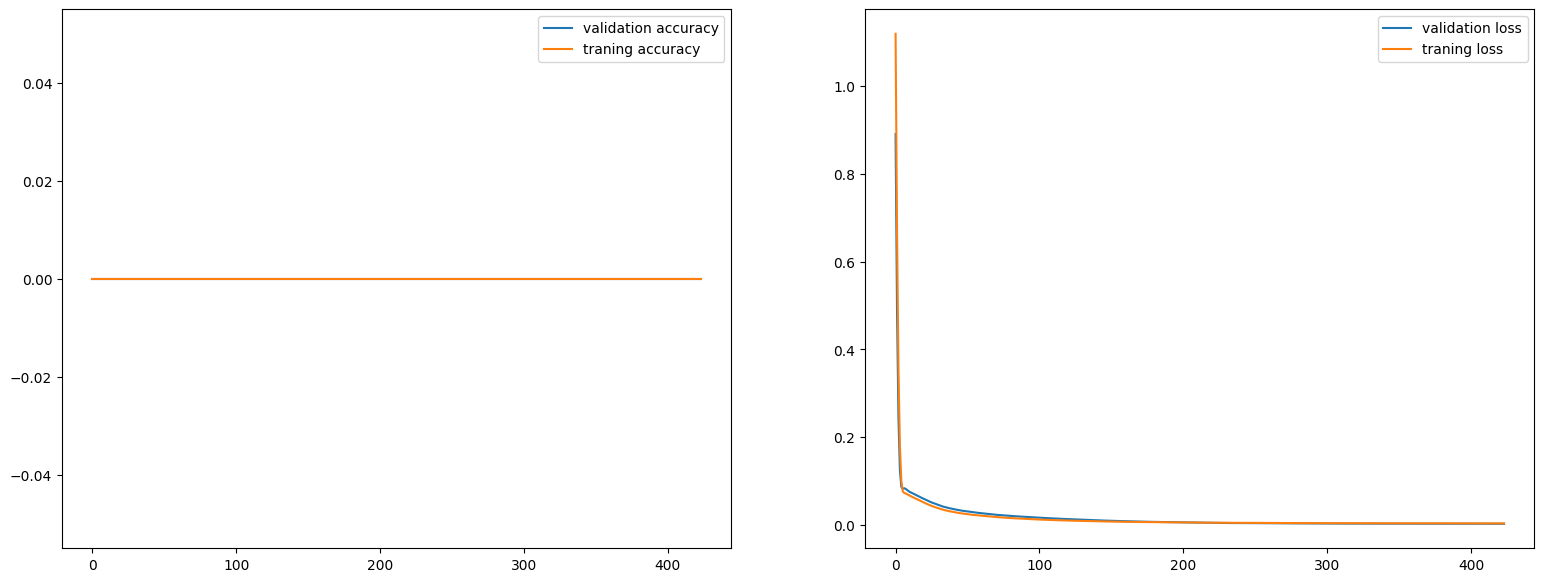

In [26]:
plt.subplots(nrows=1,ncols=2,figsize = (19,7))
plt.subplot(1,2,1)
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['validation accuracy','traning accuracy'])
plt.subplot(1,2,2)
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['validation loss','traning loss'])